In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df1 = pd.read_csv(r'C:\Users\Sarthak\Desktop\EPL_DS_Challenge\epl_players.csv')
df1.head()

,player_id,birthday,height,weight,date,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,155782,12/15/1989 0:00,170.18,146.0,4/21/2016 0:00,left,high,medium,80.0,53.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
1,155782,12/15/1989 0:00,170.18,146.0,4/7/2016 0:00,left,high,medium,80.0,53.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
2,155782,12/15/1989 0:00,170.18,146.0,1/7/2016 0:00,left,high,medium,79.0,52.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
3,155782,12/15/1989 0:00,170.18,146.0,12/24/2015 0:00,left,high,medium,79.0,51.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
4,155782,12/15/1989 0:00,170.18,146.0,12/17/2015 0:00,left,high,medium,79.0,51.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [3]:
#df1 = pd.read_csv(r'C:\Users\Sarthak\Desktop\EPL_DS_Challenge\epl_goals.csv')

In [5]:
df1.columns

Index(['player_id', 'birthday', 'height', 'weight', 'date', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [4]:
num=['crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes']

In [6]:
df1_mean=df1.groupby(['player_id'],as_index=False)['crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'].mean()

C:\Users\Sarthak\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [7]:
df1_mode=df1.groupby(['player_id'],as_index=False)['preferred_foot',
       'attacking_work_rate', 'defensive_work_rate'].agg(pd.Series.mode)

C:\Users\Sarthak\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [7]:
df1_mode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 1396
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   player_id            1397 non-null   int64 
 1   preferred_foot       1397 non-null   object
 2   attacking_work_rate  1397 non-null   object
 3   defensive_work_rate  1397 non-null   object
dtypes: int64(1), object(3)
memory usage: 54.6+ KB


In [8]:
df1_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 1396
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_id           1397 non-null   int64  
 1   crossing            1397 non-null   float64
 2   finishing           1397 non-null   float64
 3   heading_accuracy    1397 non-null   float64
 4   short_passing       1397 non-null   float64
 5   volleys             1377 non-null   float64
 6   dribbling           1397 non-null   float64
 7   curve               1377 non-null   float64
 8   free_kick_accuracy  1397 non-null   float64
 9   long_passing        1397 non-null   float64
 10  ball_control        1397 non-null   float64
 11  acceleration        1397 non-null   float64
 12  sprint_speed        1397 non-null   float64
 13  agility             1377 non-null   float64
 14  reactions           1397 non-null   float64
 15  balance             1377 non-null   float64
 16  shot_p

In [8]:
df1_mode=df1_mode.drop(['player_id'],axis=1)

In [9]:
df1=pd.concat([df1_mean,df1_mode],axis=1)

In [10]:
df1.head()

,player_id,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate
0,2802,77.181818,72.636364,55.727273,71.636364,68.272727,83.090909,80.090909,75.681818,69.590909,...,43.045455,36.000000,11.863636,16.909091,23.000000,11.500000,9.954545,right,high,medium
1,3512,71.384615,57.615385,42.153846,66.846154,67.384615,72.615385,65.076923,61.846154,64.384615,...,48.384615,61.384615,7.307692,11.846154,38.384615,15.769231,15.538462,left,medium,medium
2,3520,76.720000,76.360000,48.120000,81.040000,75.640000,83.960000,74.240000,74.280000,76.000000,...,29.240000,27.280000,8.840000,13.440000,28.240000,10.400000,16.520000,right,low,low
3,8922,46.200000,77.720000,75.680000,58.040000,69.480000,69.280000,64.080000,67.240000,40.920000,...,18.160000,16.240000,5.280000,13.080000,13.800000,13.080000,9.080000,right,medium,medium
4,8985,57.769231,56.230769,71.230769,69.961538,65.884615,54.461538,42.230769,69.423077,66.884615,...,72.961538,64.807692,10.769231,8.807692,22.692308,15.269231,15.269231,right,medium,medium


In [18]:
df1.head()

,player_id,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate
0,2802,77.0,72.0,55.0,71.0,68.272727,83.0,80.090909,75.681818,69.590909,...,43.045455,36.000000,11.863636,16.909091,23.000000,11.500000,9.954545,right,high,medium
1,3512,71.0,57.0,42.0,66.0,67.384615,72.0,65.076923,61.846154,64.384615,...,48.384615,61.384615,7.307692,11.846154,38.384615,15.769231,15.538462,left,medium,medium
2,3520,76.0,76.0,48.0,81.0,75.640000,83.0,74.240000,74.280000,76.000000,...,29.240000,27.280000,8.840000,13.440000,28.240000,10.400000,16.520000,right,low,low
3,8922,46.0,77.0,75.0,58.0,69.480000,69.0,64.080000,67.240000,40.920000,...,18.160000,16.240000,5.280000,13.080000,13.800000,13.080000,9.080000,right,medium,medium
4,8985,57.0,56.0,71.0,69.0,65.884615,54.0,42.230769,69.423077,66.884615,...,72.961538,64.807692,10.769231,8.807692,22.692308,15.269231,15.269231,right,medium,medium


In [17]:
df1_mean = df1_mean.reset_index()

In [23]:
df1_mean.isnull().sum()

index                 0
player_id             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
dribbling             0
free_kick_accuracy    0
long_passing          0
ball_control          0
acceleration          0
sprint_speed          0
reactions             0
shot_power            0
stamina               0
strength              0
long_shots            0
aggression            0
interceptions         0
positioning           0
penalties             0
marking               0
standing_tackle       0
gk_diving             0
gk_handling           0
gk_kicking            0
gk_positioning        0
gk_reflexes           0
dtype: int64

In [22]:
df1_mean = df1_mean.dropna(axis=1) 

In [24]:
mms = StandardScaler()
mms.fit(df1_mean)
normalized_data = mms.transform(df1_mean)

In [25]:
normalized_data

array([[-1.73081142, -0.7860772 ,  1.16137328, ..., -0.04078653,
        -0.32226047, -0.40682681],
       [-1.72833174, -0.78013858,  0.82394826, ...,  0.90389712,
        -0.05314972, -0.07966392],
       [-1.72585207, -0.78007166,  1.13449325, ...,  0.28097272,
        -0.39159892, -0.02215537],
       ...,
       [ 1.72585207,  5.10388754, -0.53714859, ..., -0.59342646,
        -0.60591775, -0.3455734 ],
       [ 1.72833174,  5.40014937, -1.00278699, ..., -0.90044865,
        -0.1646731 , -0.40416362],
       [ 1.73081142,  5.46731433, -1.29381099, ..., -0.96185308,
        -0.4168129 , -0.3455734 ]])

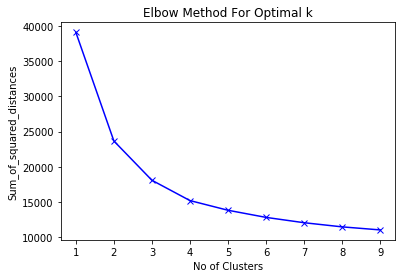

In [28]:
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [29]:
km = KMeans(n_clusters=4)
km = km.fit(normalized_data)

In [31]:
df1_mean['labels'] = km.labels_
df1_mean.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,positioning,penalties,marking,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels
0,0,2802,77.181818,72.636364,55.727273,71.636364,83.090909,75.681818,69.590909,80.045455,...,74.318182,71.363636,38.863636,43.045455,11.863636,16.909091,23.000000,11.500000,9.954545,3
1,1,3512,71.384615,57.615385,42.153846,66.846154,72.615385,61.846154,64.384615,71.384615,...,67.076923,69.923077,44.153846,48.384615,7.307692,11.846154,38.384615,15.769231,15.538462,3
2,2,3520,76.720000,76.360000,48.120000,81.040000,83.960000,74.280000,76.000000,85.680000,...,78.320000,71.240000,22.840000,29.240000,8.840000,13.440000,28.240000,10.400000,16.520000,3
3,3,8922,46.200000,77.720000,75.680000,58.040000,69.280000,67.240000,40.920000,71.720000,...,78.200000,75.160000,17.720000,18.160000,5.280000,13.080000,13.800000,13.080000,9.080000,3
4,4,8985,57.769231,56.230769,71.230769,69.961538,54.461538,69.423077,66.884615,66.692308,...,52.000000,59.923077,71.192308,72.961538,10.769231,8.807692,22.692308,15.269231,15.269231,0


In [32]:
df1_mean.drop(['index'],axis=1)

,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,acceleration,...,positioning,penalties,marking,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels
0,2802,77.181818,72.636364,55.727273,71.636364,83.090909,75.681818,69.590909,80.045455,81.000000,...,74.318182,71.363636,38.863636,43.045455,11.863636,16.909091,23.000000,11.500000,9.954545,3
1,3512,71.384615,57.615385,42.153846,66.846154,72.615385,61.846154,64.384615,71.384615,76.615385,...,67.076923,69.923077,44.153846,48.384615,7.307692,11.846154,38.384615,15.769231,15.538462,3
2,3520,76.720000,76.360000,48.120000,81.040000,83.960000,74.280000,76.000000,85.680000,79.000000,...,78.320000,71.240000,22.840000,29.240000,8.840000,13.440000,28.240000,10.400000,16.520000,3
3,8922,46.200000,77.720000,75.680000,58.040000,69.280000,67.240000,40.920000,71.720000,70.080000,...,78.200000,75.160000,17.720000,18.160000,5.280000,13.080000,13.800000,13.080000,9.080000,3
4,8985,57.769231,56.230769,71.230769,69.961538,54.461538,69.423077,66.884615,66.692308,55.730769,...,52.000000,59.923077,71.192308,72.961538,10.769231,8.807692,22.692308,15.269231,15.269231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,693138,51.500000,31.000000,63.500000,53.000000,47.000000,37.000000,47.500000,50.250000,67.750000,...,34.750000,46.000000,58.000000,72.500000,6.000000,11.000000,8.000000,11.000000,9.000000,1
1393,696365,44.571429,68.285714,62.428571,56.571429,70.714286,56.428571,43.142857,62.000000,80.428571,...,65.285714,74.000000,20.857143,20.000000,11.000000,6.000000,15.000000,7.000000,14.000000,3
1394,706985,48.000000,44.571429,61.000000,60.285714,59.571429,48.000000,56.571429,58.571429,57.000000,...,55.000000,50.000000,51.714286,53.142857,11.000000,10.000000,14.000000,7.000000,11.000000,1
1395,742405,40.000000,32.000000,50.000000,55.000000,48.000000,38.000000,55.000000,48.000000,65.000000,...,47.000000,42.000000,38.000000,60.000000,11.000000,12.000000,9.000000,14.000000,10.000000,1


In [33]:
df1=pd.concat([df1_mean,df1_mode],axis=1)

In [34]:
df1.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate
0,0,2802,77.181818,72.636364,55.727273,71.636364,83.090909,75.681818,69.590909,80.045455,...,43.045455,11.863636,16.909091,23.000000,11.500000,9.954545,3,right,high,medium
1,1,3512,71.384615,57.615385,42.153846,66.846154,72.615385,61.846154,64.384615,71.384615,...,48.384615,7.307692,11.846154,38.384615,15.769231,15.538462,3,left,medium,medium
2,2,3520,76.720000,76.360000,48.120000,81.040000,83.960000,74.280000,76.000000,85.680000,...,29.240000,8.840000,13.440000,28.240000,10.400000,16.520000,3,right,low,low
3,3,8922,46.200000,77.720000,75.680000,58.040000,69.280000,67.240000,40.920000,71.720000,...,18.160000,5.280000,13.080000,13.800000,13.080000,9.080000,3,right,medium,medium
4,4,8985,57.769231,56.230769,71.230769,69.961538,54.461538,69.423077,66.884615,66.692308,...,72.961538,10.769231,8.807692,22.692308,15.269231,15.269231,0,right,medium,medium


In [35]:
df1.shape

(1397, 32)

In [41]:
df_def=df1[df1['labels']==1]

In [42]:
df_def.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate
8,8,11736,49.125000,38.000000,71.187500,64.812500,48.750000,35.875000,56.187500,61.437500,...,72.625000,6.750000,14.000000,27.937500,17.625000,14.187500,1,right,medium,medium
9,9,13423,64.588235,45.294118,79.176471,59.352941,37.882353,48.764706,53.000000,50.235294,...,71.764706,7.000000,16.529412,22.411765,9.352941,8.588235,1,right,medium,high
10,10,14551,48.000000,26.000000,72.000000,53.000000,48.000000,44.000000,58.000000,51.000000,...,64.666667,11.000000,6.000000,12.000000,7.000000,8.000000,1,"[left, right]",medium,medium
17,17,19020,31.160000,48.200000,85.560000,51.600000,38.360000,21.160000,51.240000,55.360000,...,79.440000,11.240000,13.040000,17.040000,11.480000,10.720000,1,right,medium,high
27,27,22764,40.304348,32.391304,85.304348,63.913043,45.826087,33.260870,60.869565,59.695652,...,82.565217,13.173913,9.434783,20.217391,10.173913,13.869565,1,right,low,high


In [43]:
df_att=df1[df1['labels']==3]
df_att.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate
0,0,2802,77.181818,72.636364,55.727273,71.636364,83.090909,75.681818,69.590909,80.045455,...,43.045455,11.863636,16.909091,23.000000,11.500000,9.954545,3,right,high,medium
1,1,3512,71.384615,57.615385,42.153846,66.846154,72.615385,61.846154,64.384615,71.384615,...,48.384615,7.307692,11.846154,38.384615,15.769231,15.538462,3,left,medium,medium
2,2,3520,76.720000,76.360000,48.120000,81.040000,83.960000,74.280000,76.000000,85.680000,...,29.240000,8.840000,13.440000,28.240000,10.400000,16.520000,3,right,low,low
3,3,8922,46.200000,77.720000,75.680000,58.040000,69.280000,67.240000,40.920000,71.720000,...,18.160000,5.280000,13.080000,13.800000,13.080000,9.080000,3,right,medium,medium
5,5,10491,72.538462,67.846154,65.923077,74.115385,73.961538,71.769231,70.192308,75.346154,...,42.961538,9.192308,16.923077,18.076923,10.461538,13.692308,3,left,medium,low


In [46]:
df_gk=df1[df1['labels']==2]
df_gk.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate
32,32,22978,20.045455,18.863636,21.681818,27.590909,19.318182,21.545455,34.954545,26.590909,...,20.090909,71.590909,69.00000,68.909091,66.363636,71.090909,2,right,medium,medium
36,36,22998,20.190476,20.380952,18.619048,24.809524,19.428571,17.333333,33.571429,21.047619,...,17.238095,75.952381,69.47619,67.952381,70.476190,74.952381,2,right,medium,medium
38,38,23021,15.375000,13.625000,18.375000,34.416667,20.041667,14.000000,42.250000,34.083333,...,16.000000,74.750000,70.50000,69.458333,69.416667,75.875000,2,right,medium,medium
42,42,23027,23.571429,20.714286,22.714286,32.142857,23.190476,19.047619,43.619048,23.571429,...,22.285714,59.047619,63.52381,59.809524,61.285714,61.857143,2,right,medium,medium
59,59,23147,16.363636,19.772727,15.681818,21.500000,14.318182,21.727273,37.000000,20.227273,...,15.000000,71.954545,58.00000,59.545455,61.454545,72.000000,2,right,medium,medium


In [48]:
df_mid=df1[df1['labels']==0]
df_mid.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,standing_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate
4,4,8985,57.769231,56.230769,71.230769,69.961538,54.461538,69.423077,66.884615,66.692308,...,72.961538,10.769231,8.807692,22.692308,15.269231,15.269231,0,right,medium,medium
7,7,11576,63.833333,67.166667,68.166667,66.333333,66.666667,68.000000,67.500000,70.333333,...,77.000000,6.166667,21.833333,58.166667,22.333333,21.833333,0,right,None,o
12,12,16218,71.636364,74.545455,61.818182,75.727273,77.454545,74.545455,73.090909,77.909091,...,35.636364,6.181818,17.909091,45.545455,17.000000,17.000000,0,left,high,low
13,13,16351,82.896552,54.000000,73.689655,75.896552,74.862069,79.620690,76.655172,76.724138,...,82.206897,14.034483,15.103448,16.620690,15.965517,7.344828,0,left,high,medium
14,14,17866,79.000000,67.730769,41.346154,72.730769,71.384615,77.653846,75.076923,74.923077,...,56.038462,11.807692,12.307692,21.230769,9.961538,15.423077,0,left,medium,low


In [54]:
df_att['rating']= df_att['crossing']*0.25 + df_att['acceleration']*0.25 + df_att['shot_power']*0.25+ df_att['finishing']*0.25

C:\Users\Sarthak\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
df_att.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate,rating
0,0,2802,77.181818,72.636364,55.727273,71.636364,83.090909,75.681818,69.590909,80.045455,...,11.863636,16.909091,23.000000,11.500000,9.954545,3,right,high,medium,76
1,1,3512,71.384615,57.615385,42.153846,66.846154,72.615385,61.846154,64.384615,71.384615,...,7.307692,11.846154,38.384615,15.769231,15.538462,3,left,medium,medium,68
2,2,3520,76.720000,76.360000,48.120000,81.040000,83.960000,74.280000,76.000000,85.680000,...,8.840000,13.440000,28.240000,10.400000,16.520000,3,right,low,low,77
3,3,8922,46.200000,77.720000,75.680000,58.040000,69.280000,67.240000,40.920000,71.720000,...,5.280000,13.080000,13.800000,13.080000,9.080000,3,right,medium,medium,66
5,5,10491,72.538462,67.846154,65.923077,74.115385,73.961538,71.769231,70.192308,75.346154,...,9.192308,16.923077,18.076923,10.461538,13.692308,3,left,medium,low,74


In [56]:
convert_dict = { 
                'rating': int
               } 
df_att = df_att.astype(convert_dict)

In [60]:
df_mid['rating']= df_mid['short_passing']*0.25 + df_mid['crossing']*0.25 + df_mid['long_shots']*0.25+ df_mid['free_kick_accuracy']*0.25

C:\Users\Sarthak\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_mid.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate,rating
4,4,8985,57.769231,56.230769,71.230769,69.961538,54.461538,69.423077,66.884615,66.692308,...,10.769231,8.807692,22.692308,15.269231,15.269231,0,right,medium,medium,66
7,7,11576,63.833333,67.166667,68.166667,66.333333,66.666667,68.000000,67.500000,70.333333,...,6.166667,21.833333,58.166667,22.333333,21.833333,0,right,None,o,68
12,12,16218,71.636364,74.545455,61.818182,75.727273,77.454545,74.545455,73.090909,77.909091,...,6.181818,17.909091,45.545455,17.000000,17.000000,0,left,high,low,74
13,13,16351,82.896552,54.000000,73.689655,75.896552,74.862069,79.620690,76.655172,76.724138,...,14.034483,15.103448,16.620690,15.965517,7.344828,0,left,high,medium,80
14,14,17866,79.000000,67.730769,41.346154,72.730769,71.384615,77.653846,75.076923,74.923077,...,11.807692,12.307692,21.230769,9.961538,15.423077,0,left,medium,low,75


In [62]:
convert_dict = { 
                'rating': int
               } 
df_mid = df_mid.astype(convert_dict)

In [64]:
df_gk['rating']= df_gk['gk_diving']*0.25 + df_gk['gk_handling']*0.25 + df_gk['gk_kicking']*0.25+ df_gk['gk_reflexes']*0.25

C:\Users\Sarthak\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
convert_dict = { 
                'rating': int
               } 
df_gk = df_gk.astype(convert_dict)
df_gk.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate,rating
32,32,22978,20.045455,18.863636,21.681818,27.590909,19.318182,21.545455,34.954545,26.590909,...,71.590909,69.00000,68.909091,66.363636,71.090909,2,right,medium,medium,70
36,36,22998,20.190476,20.380952,18.619048,24.809524,19.428571,17.333333,33.571429,21.047619,...,75.952381,69.47619,67.952381,70.476190,74.952381,2,right,medium,medium,72
38,38,23021,15.375000,13.625000,18.375000,34.416667,20.041667,14.000000,42.250000,34.083333,...,74.750000,70.50000,69.458333,69.416667,75.875000,2,right,medium,medium,72
42,42,23027,23.571429,20.714286,22.714286,32.142857,23.190476,19.047619,43.619048,23.571429,...,59.047619,63.52381,59.809524,61.285714,61.857143,2,right,medium,medium,61
59,59,23147,16.363636,19.772727,15.681818,21.500000,14.318182,21.727273,37.000000,20.227273,...,71.954545,58.00000,59.545455,61.454545,72.000000,2,right,medium,medium,65


In [70]:
df_def['rating']= df_def['strength']*0.25 + df_def['standing_tackle']*0.25 + df_def['marking']*0.25+ df_def['positioning']*0.25

C:\Users\Sarthak\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
convert_dict = { 
                'rating': int
               } 
df_def = df_def.astype(convert_dict)
df_def.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate,rating
8,8,11736,49.125000,38.000000,71.187500,64.812500,48.750000,35.875000,56.187500,61.437500,...,6.750000,14.000000,27.937500,17.625000,14.187500,1,right,medium,medium,68
9,9,13423,64.588235,45.294118,79.176471,59.352941,37.882353,48.764706,53.000000,50.235294,...,7.000000,16.529412,22.411765,9.352941,8.588235,1,right,medium,high,69
10,10,14551,48.000000,26.000000,72.000000,53.000000,48.000000,44.000000,58.000000,51.000000,...,11.000000,6.000000,12.000000,7.000000,8.000000,1,"[left, right]",medium,medium,53
17,17,19020,31.160000,48.200000,85.560000,51.600000,38.360000,21.160000,51.240000,55.360000,...,11.240000,13.040000,17.040000,11.480000,10.720000,1,right,medium,high,76
27,27,22764,40.304348,32.391304,85.304348,63.913043,45.826087,33.260870,60.869565,59.695652,...,13.173913,9.434783,20.217391,10.173913,13.869565,1,right,low,high,73


In [72]:
rslt_mid = df_mid.sort_values(by = 'rating', ascending = False) 

In [73]:
rslt_mid.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate,rating
407,407,30618,86.833333,80.138889,73.888889,86.944444,75.472222,82.611111,87.444444,83.944444,...,11.888889,15.694444,24.222222,7.027778,11.444444,0,right,medium,high,85
403,403,30613,83.419355,77.580645,70.612903,92.741935,82.000000,80.645161,91.645161,89.032258,...,6.548387,12.258065,26.935484,15.870968,15.967742,0,right,high,medium,84
429,429,30699,80.000000,79.900000,91.800000,87.800000,72.800000,84.400000,86.600000,86.000000,...,8.400000,16.600000,57.000000,16.000000,14.100000,0,right,medium,high,84
462,462,30889,78.785714,60.857143,72.607143,90.000000,69.928571,83.285714,92.571429,85.178571,...,8.071429,11.071429,27.500000,12.607143,12.678571,0,right,medium,high,83
415,415,30631,80.583333,83.555556,69.750000,84.944444,77.305556,81.222222,86.222222,83.194444,...,11.388889,14.888889,27.944444,11.638889,9.888889,0,right,medium,medium,83


In [86]:
top_mid=rslt_mid.head(10)
top_mid.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate,rating
407,407,30618,86.833333,80.138889,73.888889,86.944444,75.472222,82.611111,87.444444,83.944444,...,11.888889,15.694444,24.222222,7.027778,11.444444,0,right,medium,high,85
403,403,30613,83.419355,77.580645,70.612903,92.741935,82.000000,80.645161,91.645161,89.032258,...,6.548387,12.258065,26.935484,15.870968,15.967742,0,right,high,medium,84
429,429,30699,80.000000,79.900000,91.800000,87.800000,72.800000,84.400000,86.600000,86.000000,...,8.400000,16.600000,57.000000,16.000000,14.100000,0,right,medium,high,84
462,462,30889,78.785714,60.857143,72.607143,90.000000,69.928571,83.285714,92.571429,85.178571,...,8.071429,11.071429,27.500000,12.607143,12.678571,0,right,medium,high,83
415,415,30631,80.583333,83.555556,69.750000,84.944444,77.305556,81.222222,86.222222,83.194444,...,11.388889,14.888889,27.944444,11.638889,9.888889,0,right,medium,medium,83


In [88]:
lowest_mid = rslt_mid.tail(10)
lowest_mid.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate,rating
294,294,25518,74.888889,31.444444,76.666667,65.555556,55.666667,46.333333,69.000000,71.444444,...,6.00,16.888889,50.222222,15.666667,16.777778,0,right,medium,medium,55
70,70,23268,63.750000,30.833333,78.208333,71.625000,50.916667,32.416667,67.041667,67.541667,...,34.75,37.500000,45.333333,36.000000,39.000000,0,right,medium,high,55
112,112,23678,57.800000,54.850000,72.350000,77.950000,67.750000,40.250000,71.950000,76.150000,...,7.60,13.600000,26.450000,12.850000,13.350000,0,right,medium,high,54
597,597,34466,64.880000,69.280000,82.120000,69.720000,64.800000,29.560000,45.560000,71.720000,...,11.48,13.360000,21.080000,15.000000,12.560000,0,right,high,high,54
773,773,40080,59.875000,38.875000,75.875000,60.125000,58.125000,35.875000,60.625000,60.375000,...,8.75,19.625000,54.250000,19.750000,19.250000,0,left,None,o,54


In [81]:
rslt_def = df_def.sort_values(by = 'rating', ascending = False) 
rslt_def.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate,rating
179,179,24134,39.000000,38.250000,89.750000,57.125000,37.125000,39.500000,63.000000,59.750000,...,9.500000,16.125000,47.500000,15.500000,16.500000,1,right,[],_0,79
383,383,30354,19.444444,34.000000,85.444444,60.444444,48.333333,33.444444,58.000000,64.666667,...,12.333333,13.000000,34.444444,15.444444,14.555556,1,right,medium,medium,78
636,636,35606,38.000000,33.323529,90.264706,68.794118,36.705882,46.058824,58.000000,64.205882,...,12.000000,13.735294,12.794118,12.911765,9.705882,1,right,medium,medium,78
592,592,34418,20.571429,25.142857,85.142857,55.428571,41.428571,24.142857,39.142857,55.571429,...,12.428571,15.142857,30.000000,14.714286,16.000000,1,right,y,es,78
406,406,30617,40.307692,31.000000,83.307692,64.692308,31.769231,34.307692,51.769231,56.538462,...,13.076923,15.461538,23.769231,16.307692,16.692308,1,right,medium,high,77


In [89]:
top_def=rslt_def.head(10)
lowest_def=rslt_def.tail(10)

In [83]:
top_def

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate,rating
179,179,24134,39.000000,38.250000,89.750000,57.125000,37.125000,39.500000,63.000000,59.750000,...,9.500000,16.125000,47.500000,15.500000,16.500000,1,right,[],_0,79
383,383,30354,19.444444,34.000000,85.444444,60.444444,48.333333,33.444444,58.000000,64.666667,...,12.333333,13.000000,34.444444,15.444444,14.555556,1,right,medium,medium,78
636,636,35606,38.000000,33.323529,90.264706,68.794118,36.705882,46.058824,58.000000,64.205882,...,12.000000,13.735294,12.794118,12.911765,9.705882,1,right,medium,medium,78
592,592,34418,20.571429,25.142857,85.142857,55.428571,41.428571,24.142857,39.142857,55.571429,...,12.428571,15.142857,30.000000,14.714286,16.000000,1,right,y,es,78
406,406,30617,40.307692,31.000000,83.307692,64.692308,31.769231,34.307692,51.769231,56.538462,...,13.076923,15.461538,23.769231,16.307692,16.692308,1,right,medium,high,77


In [84]:
lowest_def

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate,rating
1375,1375,570760,33.00,22.500,57.00,53.000,34.0000,22.500,44.5000,41.0000,...,11.500,8.500,6.500,10.500,7.500,1,right,medium,medium,51
1329,1329,316688,45.00,29.375,53.00,63.875,44.3125,33.375,53.6875,57.4375,...,5.375,13.375,8.375,7.375,7.375,1,"[left, right]",medium,medium,50
45,45,23036,58.75,48.000,41.00,60.625,63.7500,44.125,45.0000,56.0000,...,7.750,16.125,35.000,16.125,14.875,1,right,None,o,48
1372,1372,562593,51.40,44.600,47.60,67.600,56.8000,54.100,66.5000,60.6000,...,11.600,6.600,7.600,7.600,11.600,1,right,high,medium,47
1357,1357,478357,46.90,42.700,31.05,64.350,46.4000,57.200,58.4500,58.0500,...,15.250,14.250,5.250,6.250,14.250,1,left,medium,medium,42


In [85]:
rslt_att = df_att.sort_values(by = 'rating', ascending = False) 
rslt_att.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate,rating
465,465,30893,83.880000,91.120000,85.520000,82.280000,92.640000,81.640000,71.720000,93.960000,...,7.480000,12.960000,28.440000,15.160000,12.760000,3,right,high,low,89
515,515,32118,76.368421,85.605263,62.684211,75.526316,79.736842,73.315789,58.710526,80.868421,...,8.789474,10.526316,21.421053,10.315789,10.447368,3,left,medium,low,84
677,677,37412,70.800000,88.685714,68.542857,82.171429,90.314286,71.428571,64.485714,89.371429,...,12.200000,16.514286,18.885714,13.285714,15.657143,3,right,high,low,83
450,450,30843,82.052632,88.710526,73.000000,82.973684,83.368421,82.105263,73.263158,86.921053,...,8.605263,11.184211,13.236842,8.736842,9.631579,3,left,high,low,83
790,790,40636,75.675000,85.650000,72.100000,79.175000,87.875000,81.325000,61.575000,86.000000,...,24.150000,23.975000,33.975000,30.925000,34.300000,3,right,high,medium,82


In [90]:
top_att=rslt_def.head(10)
lowest_att=rslt_def.tail(10)

In [91]:
top_att.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate,rating
179,179,24134,39.000000,38.250000,89.750000,57.125000,37.125000,39.500000,63.000000,59.750000,...,9.500000,16.125000,47.500000,15.500000,16.500000,1,right,[],_0,79
383,383,30354,19.444444,34.000000,85.444444,60.444444,48.333333,33.444444,58.000000,64.666667,...,12.333333,13.000000,34.444444,15.444444,14.555556,1,right,medium,medium,78
636,636,35606,38.000000,33.323529,90.264706,68.794118,36.705882,46.058824,58.000000,64.205882,...,12.000000,13.735294,12.794118,12.911765,9.705882,1,right,medium,medium,78
592,592,34418,20.571429,25.142857,85.142857,55.428571,41.428571,24.142857,39.142857,55.571429,...,12.428571,15.142857,30.000000,14.714286,16.000000,1,right,y,es,78
406,406,30617,40.307692,31.000000,83.307692,64.692308,31.769231,34.307692,51.769231,56.538462,...,13.076923,15.461538,23.769231,16.307692,16.692308,1,right,medium,high,77


In [92]:
lowest_att.head()

,index,player_id,crossing,finishing,heading_accuracy,short_passing,dribbling,free_kick_accuracy,long_passing,ball_control,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,labels,preferred_foot,attacking_work_rate,defensive_work_rate,rating
1366,1366,515338,65.857143,36.500000,35.000000,51.000000,46.000000,27.000000,51.000000,55.000000,...,14.000000,12.000000,15.000000,13.000000,8.000000,1,left,medium,medium,53
10,10,14551,48.000000,26.000000,72.000000,53.000000,48.000000,44.000000,58.000000,51.000000,...,11.000000,6.000000,12.000000,7.000000,8.000000,1,"[left, right]",medium,medium,53
1058,1058,148909,47.500000,45.708333,42.125000,67.041667,61.666667,35.041667,59.250000,60.250000,...,8.750000,12.083333,14.375000,16.250000,10.416667,1,right,medium,high,53
959,959,102602,57.681818,54.090909,42.090909,53.909091,59.227273,48.545455,48.954545,59.090909,...,6.136364,13.045455,16.954545,10.590909,8.954545,1,right,medium,medium,52
1395,1395,742405,40.000000,32.000000,50.000000,55.000000,48.000000,38.000000,55.000000,48.000000,...,11.000000,12.000000,9.000000,14.000000,10.000000,1,right,medium,medium,51
